In [1]:
import os 

import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
# sns.set()

In [2]:
def load_data(data):
    if os.path.exists(data):
        df = pd.read_csv(data)
    else:
        df = pd.read_csv("https://data.openup.org.za/dataset/0d9dd13d-682a-452d-b5ed-52dca3c92fb2/resource/793f1484-0c44-459d-827f-f05b67e7371d/download/final_qlfs_employment_status_by_quarter_2019_to_2023.csv")
    return df

In [3]:
data  = "jobs_inverstigation.csv"
df = load_data(data)
df.head()

,Geography,Employment status,Count,Year Period,Year
0,WC,Employed,2.548286e+06,Q1 – 2019,2019
1,WC,Unemployed,6.100661e+05,Q1 – 2019,2019
2,WC,Discouraged job seeker,7.247239e+04,Q1 – 2019,2019
3,WC,Other not economically active,1.829408e+06,Q1 – 2019,2019
4,EC,Employed,1.331279e+06,Q1 – 2019,2019


In [4]:
for co in df.columns:
    if " " in co:
       df.rename(columns={co: co.replace(" ", "_")} , inplace=True)    

df.head()

,Geography,Employment__status,Count,Year_Period,Year
0,WC,Employed,2.548286e+06,Q1 – 2019,2019
1,WC,Unemployed,6.100661e+05,Q1 – 2019,2019
2,WC,Discouraged job seeker,7.247239e+04,Q1 – 2019,2019
3,WC,Other not economically active,1.829408e+06,Q1 – 2019,2019
4,EC,Employed,1.331279e+06,Q1 – 2019,2019


In [5]:
df_jhb = df[df['Geography'] == 'JHB'].reset_index()
df_jhb.head()

,index,Geography,Employment__status,Count,Year_Period,Year
0,60,JHB,Employed,2.032248e+06,Q1 – 2019,2019
1,61,JHB,Unemployed,8.520118e+05,Q1 – 2019,2019
2,62,JHB,Discouraged job seeker,7.094660e+04,Q1 – 2019,2019
3,63,JHB,Other not economically active,1.181472e+06,Q1 – 2019,2019
4,132,JHB,Employed,1.975982e+06,Q2 – 2019,2019


In [6]:
def calculate_total_count(year, df, employment_status):
    num_year = []
    total_count = 0
    for index, row in df.iterrows():
        if row['Employment__status'] == employment_status and row['Year'] == year:
            count = row['Count']
            num_year.append(int(count))

    for n in num_year:
        total_count += n

    return total_count

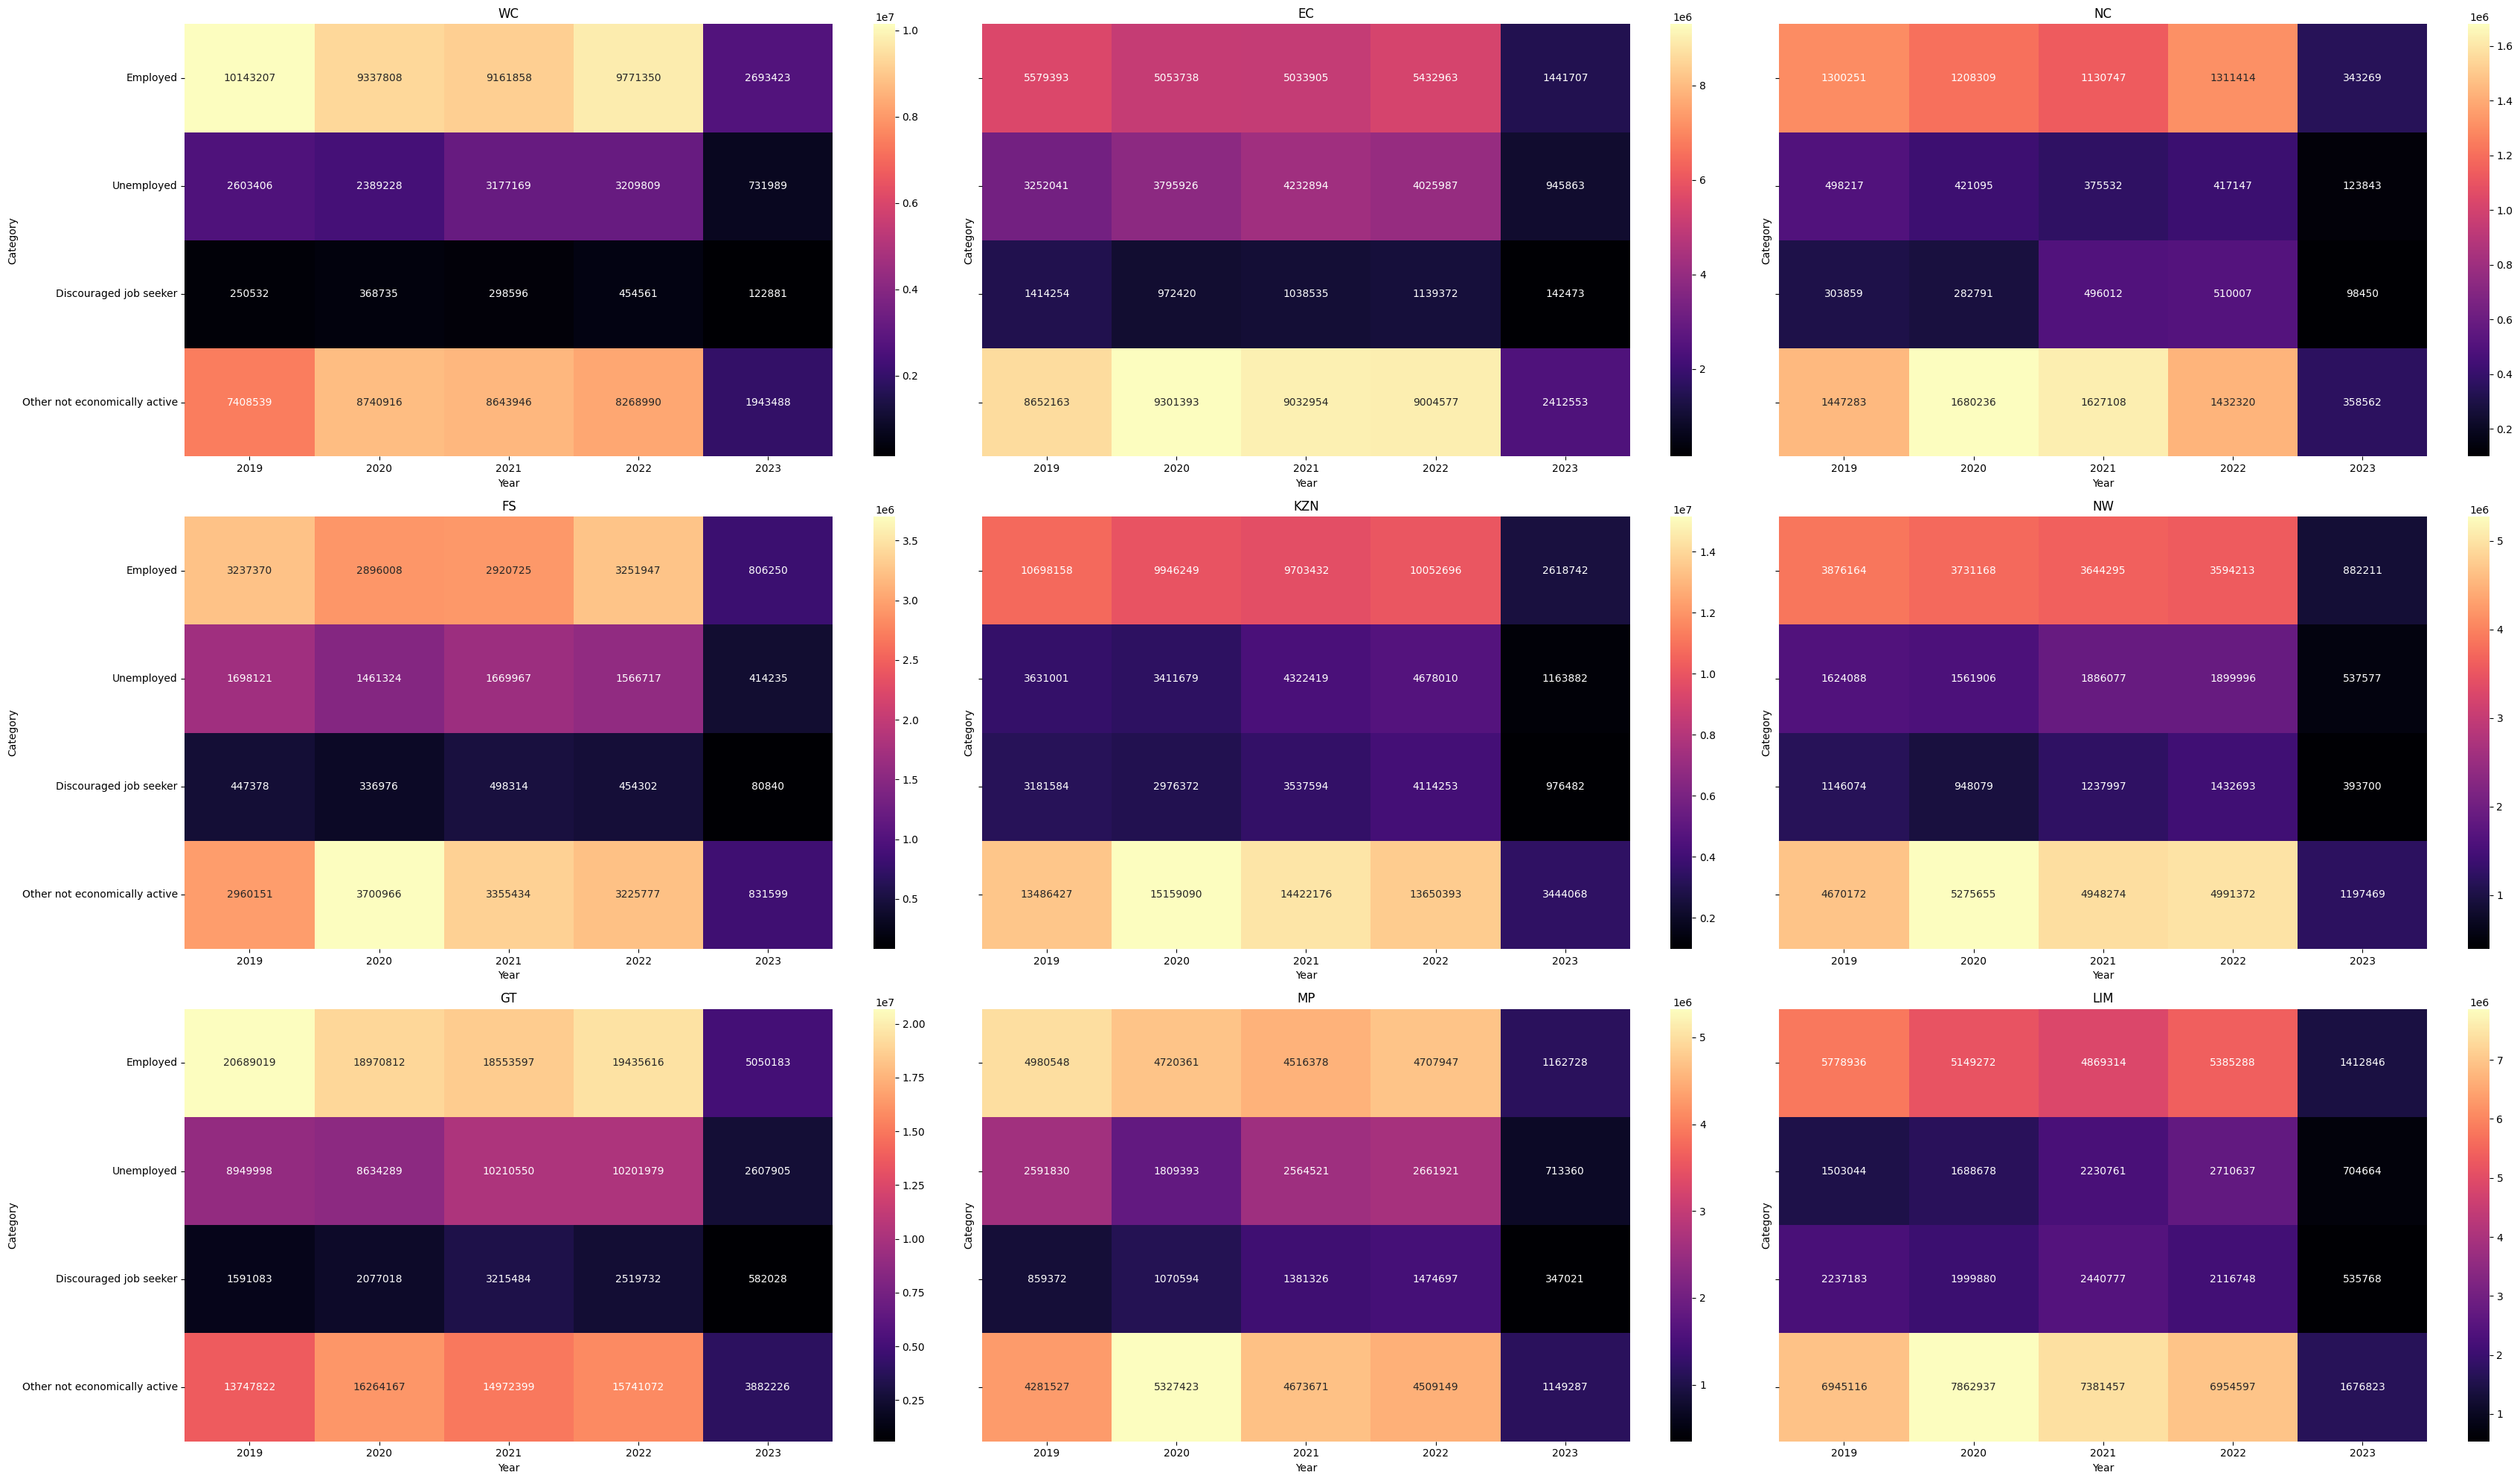

In [7]:
fig, axes = plt.subplots(3, 3, figsize=(35, 20), sharey="row")
axes = axes.flatten()

for ax, (index, priv) in zip(axes, enumerate(df['Geography'].unique())):
    df_w = df[df['Geography'] == priv].reset_index()
    
    df_ = pd.DataFrame(index=df_w['Employment__status'].unique())
    df_ = df_.reset_index()
    
    for i in range(2019, 2024, 1):
        n_19 = []
        for im in df_['index']:
            n_19.append(calculate_total_count(i, df_w, im))
        
        df_[i] = n_19
    
    df_.rename(columns={'index':'status'}, inplace=True)
    df_.set_index('status', inplace=True)
    
    sns.heatmap(df_, annot=True, fmt="d", cmap="magma", ax=ax)
    ax.set_xlabel('Year')
    ax.set_ylabel('Category')
    ax.set_title(priv)

plt.tight_layout()
plt.show()